# 支持向量机算法在心脏病预测中的应用

## 一、实验简介

### （一）问题描述

心脏病是人类健康的头号杀手，全世界1/3的人口死亡是心脏病引起的。

如何快速、有效地对心脏病进行诊断始终是生命科学领域研究的重点问题之一。如果可以通过采集人体相关的体测指标数据，利用机器学习来分析这些数据的各个特征对于心脏病的影响，帮助医生做出有效的决策，将对心脏病的治疗起到至关重要的作用。

本实验借助美国某区域的心脏病检查患者的体测数据，利用Sklearn机器学习库中的支持向量机算法对该地区的体测数据进行学习，再对新的体测数据进行预测，判断其是否患有心脏病。

### （二）问题需求
本实验中的数据集中总共有303个样本数据，每个样本包含14个属性，其中属性target代表分类标签(0=no；1=yes)。

数据中其它属性的具体描述如下：


|特征名|特征含义|
|---|---|
|age|年龄|
|sex|性别 1=male，0=female|
|cp|胸痛类型(4种) 值1：典型心绞痛；值2：非典型心绞痛；值3：非心绞痛；值4：无症状 |
|trestbps|静息血压|
|chol|血清胆固醇|
|fbs|空腹血糖 >120mg/dl，1=true；0=false|
|restecg|静息心电图(值0，1，2)|
|thalach|达到的最大心率|
|exang|运动诱发的心绞痛(1=yes；0=no)|
|oldpeak|相对于休息的运动引起的ST值(ST值与心电图上的位置有关)|
|slope|运动高峰ST段的坡度， Value 1： upsloping向上倾斜； Value 2： flat持平； Value 3： downsloping向下倾斜 |
|ca|透视检查看到的血管数(0-3)|
|thal|缺陷种类(3 =正常；6 =固定缺陷；7 =可逆转缺陷)| 

实验中将整个数据集以8:2的比例拆分为训练集与测试集。

数据文件所在的位置“支持向量机\data\hearts.csv”。

本实验将使用心脏病数据训练集来训练SVM模型，并使用测试集在训练得到的模型上进行验证，得到每个类别的精确度、召回率、F1值等信息。

## 二、实验任务
本实验利用Sklearn库中的支持向量机模块，通过将303个样本中的80%作为训练集对支持向量机模型进行训练，使用训练后的模型对其余20%的样本进行分类预测。

具体的实验任务如下：

1.观察数据集：加载数据集，并观察数据集的整体情况，查看数据的行、列数以及各个数据的数据类型，对数据进行描述性统计，大致了解本实验的数据集。

2.数据可视化：对age这列特征进行分析，并绘出直方图，观察不同年龄的统计情况。

3.数据处理：对age这列特征划分等级，构造成新的类别型特征；再对此数据集的特征进行独热编码；为减少计算量，需要对特征数据进行标准化。

4.数据集的划分：实验中需要将数据集按8:2的比例划分成训练集和测试集。

5.模型训练：需要实现SVM模型，并使用训练集对模型进行训练。

6.模型的评估：需要用测试集评估模型分类结果的准确度。

## 三、实验步骤

### （一）加载相关的包
1.加载Numpy、Pandas等包做数据处理。

2.加载Matplotlib包做数据可视化。

3.从Sklearn.svm加载SVC算法函数。

4.从Sklearn.preprocessing中加载StandardScaler函数。

5.从Sklearn.model_selection中加载train_test_split训练集-测试集划分的函数。

6.从Sklearn.metrics中加载classification_report评估函数。

In [1]:
import numpy as np  # 数据处理包
import pandas as pd  # 文件读取包
import seaborn as sns  # 数据可视化包
import matplotlib.pyplot as plt  # 数据可视化包
from sklearn.svm import SVC  # 支持向量机包
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.model_selection import train_test_split  # 数据划分函数
from sklearn.metrics import classification_report  # 评估函数

### （二）加载数据集

利用Pandas中的read_csv()方法来读取csv格式的数据文件。

In [2]:
train = pd.read_csv('data/heart.csv')  # 加载数据文件,注意加载数据文件的方式

为了更直观的了解数据集的内容，观察数据的整体特征，可以使用Pandas中的head(15)函数和tail(15)函数来查看整个dataframe中的前后15行数据。

In [3]:
train.head(15)  # 观察数据集的前15行

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
train.tail(15)  # 观察数据集的后15行

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


### （三）数据处理

读取完数据集后，需要观察数据集的信息，对数据进行预处理，解决掉干扰因素，才能更加精准地分析结果。一般而言该阶段包括：观察数据统计信息、缺失数据处理、冗余数据处理、标准化等过程。 本实验数据处理的主要工作如下：

1.观察数据集：观察数据的整体信息，查看数据描述统计信息，便于后续的数据预处理。

2.缺失值判断：如果含有缺失值，需要进行相应的填充，保证数据的完整性。

3.数据可视化：对数据的特征进行可视化，分析数据，并对特征进行相应的处理。

5.数据标准化：对数据进行标准化。

6.数据集的划分：将数据划分成训练集和测试集。

**（1）观察数据集** 

利用Pandas中的info()函数来查看数据集的大小、行列规模以及数据类型。

In [5]:
train.info()  # 观察数据的整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


利用pandas中的describe()函数来查看数据集的描述性统计信息，包括计数、均值、std、各个分位数等，数据集里的NaN值不参与计算。

In [6]:
train.describe()  # 数据集的统计数据

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**（2）缺失值判断**

由于模型训练时需要一个无缺失值的数据，在数据处理的过程中需要对缺失值进行检测，可以利用pandas.isnull().sum()查看数据集是否存在缺失值，如果含有缺失值，需要进行缺失值处理。

isnull()函数返回的是布尔型的矩阵，某处如为缺失值，值是True；某处不为缺失值，值是False。再通过sum()函数对缺失值数量进行统计。

In [7]:
train.isnull().sum() # 可以观察到数据集没有缺失值，后面无需做缺失值处理

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**（3）数据可视化**

为了减小算法的时间和空间开销，可以对数据进行离散化。离散化特征易于模型的快速迭代，也对异常数据有很强的鲁棒性。比如一个特征是年龄，年龄>30是1，否则0。如果特征没有离散化，一个异常数据“年龄300岁”会给模型造成很大的干扰。在进行数据的离散化时，可以对数据集的年龄这列特征画出其直方图来观察年龄的分布情况。

绘制直方图时，首先利用pd.crosstab(index,columns)函数按照指定的行和列统计分组频数，然后利用Pandas下的自带的plot(kind="bar",figsize=(20,8))函数绘出年龄的直方图，以便更直观的观察年龄这列特征，最后利用plt.xlabel()和plt.ylabel()设置坐标轴的lable。

plt.crosstab()函数所使用的参数解释：
    
    index： 用于行分组的值。
    columns：用于列分组的值。
    
plot()函数所使用的参数解释：
   
    kind：选择图表类型，默认为折线图。可选参数为‘line’(折线图)、‘bar’(柱状图，竖直方向)、‘barh’(柱状图，水平方向)、‘hist’(直方图)、‘box’(箱线图)等。
    figsize：设置画布的大小，其中20代表画布的长度，8代表画布的高度。

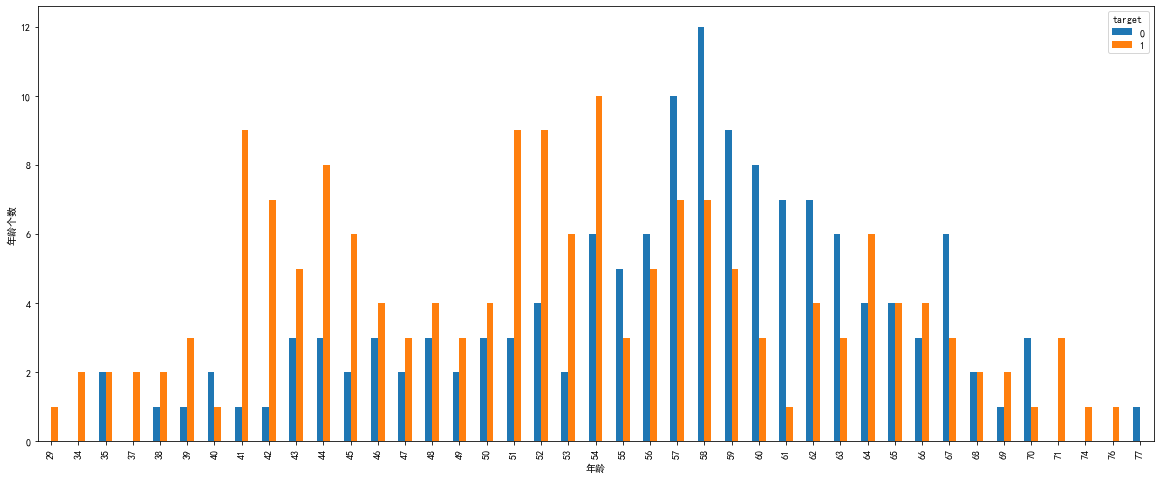

In [8]:
plt.rcParams['font.family'] = 'SimHei' # 解决Matplotlib绘图显示中文的问题
pd.crosstab(train.age,train.target).plot(kind="bar",figsize=(20,8))
plt.xlabel('年龄')# x轴
plt.ylabel('年龄个数')# y轴
plt.show()

通过观察年龄分布情况，划分年龄阶段的最好标准是将年龄分为老年人、中年人、年轻人三个阶段。

首先利用min(),max(),dataframe.mean()分别求最小、最大年龄和年龄均值。

In [9]:
minAge=min(train.age)# 求年龄最小值
maxAge=max(train.age)# 求年龄最大值
meanAge=train.age.mean()# 求年龄均值
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


根据均值、最小值等对年龄这列特征设定合适的范围，以条件的形式将三范围里的年龄进行提取，再次对年龄进行统计和可视化。

In [10]:
young_ages=train[(train.age>=29)&(train.age<40)] #对大于29并且小于40的数据进行提取
middle_ages=train[(train.age>=40)&(train.age<55)]#对大于40并且小于55的数据进行提取
elderly_ages=train[(train.age>55)]#对大于55的数据进行提取
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


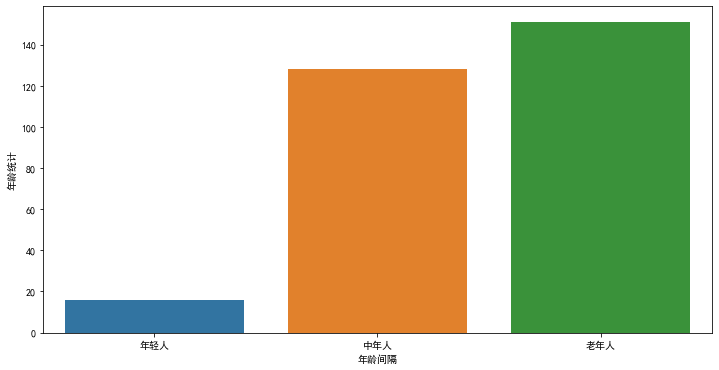

In [11]:
plt.figure(figsize=(12,6))#创建画布，并设置画布的长度和宽度的参数
#绘画出直方图，可以用来观察分层后年龄计数
sns.barplot(x=['年轻人','中年人','老年人'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('年龄间隔')
plt.ylabel('年龄统计')
plt.show()

通过观察上面的直方图，可以获取区间，再将年龄这列连续变量进行离散化。

在此将需要利用Pandas中以区间和索引的方式对年龄进行分层，分别获取三个年龄阶段的下标。

In [12]:
train['AgeRange']=0 # 在数据train中新增AgeRange这一列
# 分别获取分层后各个年龄层的下标
youngAge_index=train[(train.age>=29)&(train.age<40)].index
middleAge_index=train[(train.age>=40)&(train.age<55)].index
elderlyAge_index=train[(train.age>55)].index

最后以索引的方式设置新建特征AgeRange里的值。

In [13]:
for index in elderlyAge_index:
    train.loc[index,'AgeRange']=2# 设置老年人值为2
    
for index in middleAge_index:
    train.loc[index,'AgeRange']=1# 设置中年人值为1

for index in youngAge_index:
    train.loc[index,'AgeRange']=0# 设置年轻人值为0

由于age这列特征已经构建成一列新特征AgeRange，需要采用pandas下的drop()函数对age这列特征进行删除。

drop()函数所使用的参数解释：

    labels：需要删除的列名。
    axis：设置删除的维度。
    inplace：是否替换原来的内容。

In [14]:
train.drop(labels="age",axis=1,inplace=True)# 删除特征age

通过观察上面显示的数据，可以发现数据集含有很多离散特征，需要将离散特征值的个数大于等于三的特征的进行独热编码。独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。在这里选取cp、restecg、slope、ca、thal这几个离散特征进行独热编码。

为了实现独热编码，可以调用Pandas下的get_dummies(data, prefix=None)函数将变量进行独热编码。  

get_dummies()函数所使用的参数解释：

    data：数据的格式为array-like、Series或者DataFrame，代表输入的数据。
    prefix：string、含字符串的list、含字符串的dict,默认为None。指定需要实现类别转换的列名。

In [15]:
# 对特征进行独热编码
dummies_cp = pd.get_dummies(train['cp'], prefix='cp')
dummies_restecg = pd.get_dummies(train['restecg'], prefix='restecg')
dummies_slope = pd.get_dummies(train['slope'], prefix='slope')
dummies_ca = pd.get_dummies(train['ca'], prefix='ca')
dummies_thal = pd.get_dummies(train['thal'], prefix='thal')

# 用concat函数将这些新的属性连接到dataframe中
train = pd.concat([train, dummies_cp, dummies_restecg,
                   dummies_slope, dummies_ca, dummies_thal], axis=1)

# 再通过drop函数将原先的属性从dataframe中去掉
train.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)
# 通过columns查看编码都的特征名
train.columns

Index(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'AgeRange', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

本实验中，由于target是标签，所以把它单独取出来，采用Pandas中取某一列的方法取出标签列数据。

In [16]:
y = train["target"]# 提取target

取得了标签数据后，需要利用pandas下的drop(列名，axis=1指定为列，inplace=是否替换原来的内容)函数删除标签列。

In [17]:
X = train.drop('target', axis=1)#删除target

**（4）数据标准化**  
因为数据标准化可以降低计算量，同时不会影响SVM模型预测的准确率。实验中利用Sklearn中StandardScaler().fit_transform(X)函数来对未进行处理的连续特征进行标准化。

In [18]:
#标准化特征数据
std = StandardScaler() 
X['trestbps'] = std.fit_transform(X['trestbps'].values.reshape(-1, 1))
X['chol'] = std.fit_transform(X['chol'].values.reshape(-1, 1))
X['thalach'] = std.fit_transform(X['thalach'].values.reshape(-1, 1))
X['oldpeak'] = std.fit_transform(X['oldpeak'].values.reshape(-1, 1))

In [19]:
X.head() # 查看处理完后数据前五行

,sex,trestbps,chol,fbs,thalach,exang,oldpeak,AgeRange,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0.763956,-0.256334,1,0.015443,0,1.087338,2,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,0,1,...,1,1,0,0,0,0,0,0,1,0
3,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,2,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0,-0.663867,2.082050,0,0.583939,1,-0.379244,2,1,0,...,1,1,0,0,0,0,0,0,1,0


**（5）数据集的划分**  
由于本实验只提供一个数据集，因此需要将数据集划分为训练集与测试集，可以采用sklearn.preprocess模块下的train_test_split(X,y，test_size=0.2)函数来划分数据集。使用训练集训练模型，用测试集测试模型的正确率，以验证模型的有效性。

train_test_split()函数所使用的参数解释：

    train_data：所要划分的样本特征集。
    train_target：所要划分的样本标签。
    test_size：样本占比，如果是整数的话就是样本的数量。

In [20]:
#划分数据集
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
train_X.shape,train_y.shape,test_X.shape,test_y.shape

((242, 27), (242,), (61, 27), (61,))

### （四）算法的介绍与应用

支持向量机（SVM）是一种二分类模型，其基本模型定义为特征空间上的间隔最大的线性分类器，其学习策略是使间隔最大化，最终可转化为一个凸二次规划问题的求解。SVM不仅适用于线性问题还合适用于非线性问题(用核函数)，但二次规划问题求解将涉及m阶矩阵的计算(m为样本的个数)，因此SVM不适用于超大数据集，同时SVM不加修改仅适用于处理二分类问题。

调用SVM算法的具体实现步骤如下：

1.实例化sklearn.svm里的SVC()算法模块。

2.利用SVC().fit(train_X,train_y)函数对训练集数据进行拟合。

3.利用model.predict(test_X)函数对测试集数据进行预测。

4.利用sklearn.metrics里的accuracy_score()进行评分。


SVC()函数所使用的参数解释：
    
    C: 错误项的惩罚系数，默认值为1.0。C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低；相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。
    
    kernel: 核函数，默认是'rbf'，可以是‘linear’（线性核），‘poly’（多项式核）， ‘rbf’(径向基核)， ‘sigmoid’（sigmod核函数）， ‘precomputed’（核矩阵）。
    
    degree： 多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。
    
    gamma： 核函数系数，只对‘rbf’，‘poly’，‘sigmod’有效。默认是’auto’，代表其值为样本特征数的倒数，即1/n_features。

classification_report()函数所使用的参数解释:
    
    y_true: 测试样本标签。
    y_pred: 预测结果。
    
本实验需要使用三个不同核函数的SVM算法对训练集数据进行训练，最后利用classification_report(test_y, pred_y)函数对这三个模型的精确度、召回率、F1值等信息进行评分。

In [21]:
# 实例化算法
clf_linear=SVC(C=1.0, kernel='linear')# 线性核
clf_poly = SVC(C=10, kernel='poly', degree=1,gamma=0.6)# 多项式核，degree表示多项式核函数的最高次项次数
clf_rbf = SVC(C=1.0, kernel='rbf', gamma=0.6)# 径向基核
#训练模型
clf_linear.fit(train_X,train_y)
clf_poly.fit(train_X,train_y)
clf_rbf.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
#用测试集测试得到预测标签
linear_pred=clf_linear.predict(test_X)
poly_pred=clf_poly.predict(test_X)
rbf_pred=clf_rbf.predict(test_X)

In [23]:
#显示各类指标
print('线性核的各类指标报告;\n',classification_report(test_y, linear_pred))
print('多项式核的各类指标报告;\n',classification_report(test_y, poly_pred))
print('径向基核的各类指标报告;\n',classification_report(test_y, rbf_pred))

线性核的各类指标报告;
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

多项式核的各类指标报告;
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

径向基核的各类指标报告;
               precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.97      0.88      0.92        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92

## 五、结果分析
本实验利用了美国某区域的心脏病检查患者的体测数据。在实验过程中完成了以下内容：缺失值判断、数据可视化、数据处理的过程、数据的编码、数据集的划分以及算法的调用，训练得到的三个模型的准确率稳定在85%左右。

在本实验中，数据集的特征比较少，样本数量一般，比较适合的核函数是径向基核（rbf），但如果数据集特征比较多，样本数量也多的情况下，在SVM算法中使用线性核（linear）是一个比较好的选择。在实际应用中，通常使用交叉验证的方法，来试用不同的核函数，误差最小的即为效果最好的核函数，或者也可以将多个核函数结合起来，形成混合核函数。

In [1]:
from sklearn.svm import SVC,SVR

In [2]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [6]:
data_x  = data.data

In [8]:
data_x.shape

(150, 4)

In [7]:
data_y = data.target

In [9]:
data_y.shape

(150,)

In [10]:
model1 = SVC(C=1.0, kernel='linear')# 线性核
model2 = SVC(C=10, kernel='poly', degree=1,gamma=0.6)# 多项式核，degree表示多项式核函数的最高次项次数
model3 = SVC(C=1.0, kernel='rbf', gamma=0.6)# 径向基核 高斯核

In [11]:
model1.fit(data_x,data_y)
model2.fit(data_x,data_y)
model3.fit(data_x,data_y)

SVC(gamma=0.6)

In [13]:
model1.predict(data_x),data.target

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [14]:
model2.predict(data_x),data.target

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [15]:
model3.predict(data_x),data.target

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2